Initialize the environment.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
from dqn_agent import Agent
import matplotlib.pyplot as plt
import torch
env = UnityEnvironment(file_name="Banana.x86_64")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Create an agent.

In [2]:
agent = Agent(
    state_size=brain.vector_observation_space_size,
    action_size=brain.vector_action_space_size, seed=0)

Learn deep Q network based agent.

Episode 100	Average Score: 0.63
Episode 200	Average Score: 3.43
Episode 300	Average Score: 6.62
Episode 400	Average Score: 9.75
Episode 500	Average Score: 11.23
Episode 600	Average Score: 13.67

Environment solved in 500 episodes!	Average Score: 13.67


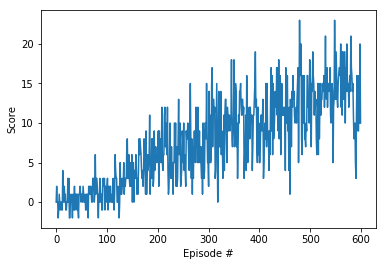

In [3]:
def dqn(
    n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning - Double DQN implementation.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, 
        for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) 
        for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if i_episode % 100 == 0:
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            if np.mean(scores_window)>13.0:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
                break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Check the results.

In [4]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

for i in range(3):
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0]
    score = 0
    for j in range(1000):
        action = agent.act(state)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        state = next_state
        score += reward
        if done:
            break 
    print('\rScore: {:.2f}'.format(score))
            
env.close()

Score: 19.00
Score: 15.00
Score: 16.00


The project uses Deep Q-Learning Algorithm (DQN) which consists of two main
processes. First process samples the environment by performing actions and
store observed experiences in the reply memory. The second process selects
small batch of tuples of experiences from the memory randomly and
learns for that batch using Adam optimizer. These processes are
independent from each other. Reply memory is circular buffer that stores most
recent experience tuples.

The project uses two types of hyperparameters:
1. Model learning related:
* reply buffer size set to 100000,
* batch size set to 64,
* discount factor set to 0.99,
* interpolation 0.001,
* learning rate set to 0.0005,
* update frequency set to 4,
2. Algorithm related:
* number of episodes set to 2000,
* number of time steps per episode set to 1000,
* greedy factor initial value set to 1,
* greedy factor minimum value set to 0.1,
* multiplicative factor (per episode) for decreasing greedy factor set to 0.995.

The network architecture consists of 3 Linear layers.

In order to enhance an algorithm following extension can be taken under consideration:
1. Double DQN,
2. Prioritized experience reply,
3. Dueling DQN,
4. Learning from multi-step bootstrap targets,
5. Distributional DQN,
6. Noisy DQN.

